> # Data cleaning 2: missing values

In [558]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [559]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

### 1. Determine all the variable types and find the fraction of the missing values for each variable.

In [560]:
# Let's take a look at what we're dealing with
education.head(20)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


In [561]:
# investigate the column types
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [562]:
# finding the fraction/percentage of null values per column
education.isnull().sum()*100/education.shape[0]

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

### 2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

I'm not exactly sure what all the variables mean, since the documentation link didn't work, but I don't think it makes sense to discard any of the columns in their entirety. If time was of the essence, I would probably toss out the AVG... scores because they are missing the majority of their values. Otherwise, I replace all the 'Nan' values with the mean value for each column. Replacing each missing value with the average for that state, throughout the years, clears all the missing values while maintaining the central tendency characteristics of the data. It might make sense to toss out the non-state rows since they are missing a lot of values and can be excluded from analyses that focus on the 50 states.

In [563]:
# Using state averages
state_mean = education.groupby('STATE').mean()

for state in education.STATE.unique():
    education[education.STATE == state] = education[education.STATE == state].fillna(state_mean.loc[state])

education.isna().sum()*100/education.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          10.790885
TOTAL_REVENUE                   10.790885
FEDERAL_REVENUE                 10.790885
STATE_REVENUE                   10.790885
LOCAL_REVENUE                   10.790885
TOTAL_EXPENDITURE               10.790885
INSTRUCTION_EXPENDITURE         10.790885
SUPPORT_SERVICES_EXPENDITURE    10.790885
OTHER_EXPENDITURE               10.790885
CAPITAL_OUTLAY_EXPENDITURE      10.790885
GRADES_PK_G                      2.747989
GRADES_KG_G                      0.268097
GRADES_4_G                       0.268097
GRADES_8_G                       0.268097
GRADES_12_G                      0.268097
GRADES_1_8_G                     0.268097
GRADES_9_12_G                    0.268097
GRADES_ALL_G                     2.747989
AVG_MATH_4_SCORE                10.790885
AVG_MATH_8_SCORE                10.790885
AVG_READING_4_SCORE             10

In [564]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [565]:
# Using the column/variable mean
for column_name in education:
    if column_name not in ['PRIMARY_KEY','STATE','YEAR']:
        education[column_name].fillna(education[column_name].mean(), inplace=True)

education.isnull().sum()*100/education.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

### 3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

This strategy is not a universal cure-all as some of the variables have no values for a given year, but the following code accomplishes what is asked, where applicable.

In [566]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [567]:
df = education.groupby('YEAR').mean()
df

,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,,,,,,,,,,,,,,,,,,,,,
1992,NaN,4.572764e+06,2.970296e+05,2.088314e+06,2.187420e+06,4.653591e+06,2.454000e+06,1.370149e+06,NaN,4.050078e+05,...,60724.875000,56872.357143,44038.767857,485748.410714,207994.392857,726734.666667,218.410116,266.360319,212.712256,263.307067
1993,802054.333333,4.768758e+06,3.086224e+05,2.209300e+06,2.250836e+06,4.788283e+06,2.540431e+06,1.419870e+06,248234.784314,4.096238e+05,...,61044.321429,59019.875000,43930.089286,491633.553571,212404.464286,738159.000000,NaN,NaN,NaN,NaN
1994,801383.960784,4.916678e+06,3.272233e+05,2.225664e+06,2.363790e+06,4.954213e+06,2.626080e+06,1.476894e+06,262916.705882,4.041495e+05,...,62184.750000,59953.285714,45072.160714,496646.464286,216987.839286,749170.222222,NaN,NaN,NaN,NaN
1995,858973.039216,5.476034e+06,3.546117e+05,2.555041e+06,2.566381e+06,5.526114e+06,2.931096e+06,1.616281e+06,295324.647059,4.765508e+05,...,62258.821429,60907.035714,45061.214286,502088.482143,222061.821429,760743.777778,NaN,NaN,NaN,NaN
1996,873930.607843,5.744172e+06,3.647964e+05,2.737296e+06,2.642080e+06,5.838049e+06,3.076873e+06,1.680742e+06,303516.137255,5.445423e+05,...,61709.245614,60714.894737,46054.245614,502958.631579,225201.280702,764874.909091,221.479509,270.182528,214.587049,261.412097
1997,888379.745098,6.115397e+06,3.869910e+05,2.940125e+06,2.788281e+06,6.193357e+06,3.245567e+06,1.762159e+06,305274.705882,6.359637e+05,...,62649.982456,60906.000000,47575.403509,507648.192982,228669.684211,773816.636364,NaN,NaN,NaN,NaN
1998,897509.058824,6.504525e+06,4.272517e+05,3.140750e+06,2.936523e+06,6.595780e+06,3.427786e+06,1.873964e+06,318956.098039,7.034032e+05,...,63126.655172,61054.206897,47627.310345,504449.672414,227326.982759,769850.535714,NaN,NaN,NaN,NaN
1999,905101.470588,6.954543e+06,4.747857e+05,3.390289e+06,3.089468e+06,7.068126e+06,3.633184e+06,1.999630e+06,334733.431373,7.937301e+05,...,64770.827586,61356.137931,48705.620690,508090.155172,230605.482759,777501.660714,NaN,NaN,NaN,NaN
2000,910446.705882,7.443181e+06,5.229861e+05,3.650809e+06,3.269385e+06,7.572106e+06,3.883017e+06,2.136325e+06,352342.941176,8.755735e+05,...,64045.983051,61031.152542,48223.338983,504013.627119,229663.101695,784420.321429,224.803526,273.028605,217.612609,262.687292


In [568]:
year_avgs = education.groupby('YEAR').mean()

for year in education.YEAR.unique():
    education[education.YEAR == year] = education[education.YEAR == year].fillna(year_avgs.loc[year])

In [569]:
education.isna().sum()*100/education.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           7.171582
TOTAL_REVENUE                    3.418231
FEDERAL_REVENUE                  3.418231
STATE_REVENUE                    3.418231
LOCAL_REVENUE                    3.418231
TOTAL_EXPENDITURE                3.418231
INSTRUCTION_EXPENDITURE          3.418231
SUPPORT_SERVICES_EXPENDITURE     3.418231
OTHER_EXPENDITURE                7.171582
CAPITAL_OUTLAY_EXPENDITURE       3.418231
GRADES_PK_G                      6.836461
GRADES_KG_G                      6.836461
GRADES_4_G                       6.836461
GRADES_8_G                       6.836461
GRADES_12_G                      6.836461
GRADES_1_8_G                     6.836461
GRADES_9_12_G                    6.836461
GRADES_ALL_G                     6.836461
AVG_MATH_4_SCORE                57.640751
AVG_MATH_8_SCORE                57.640751
AVG_READING_4_SCORE             57

### 4. This time, fill in the missing values using interpolation (extrapolation).

In [570]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [571]:
education = education.interpolate(limit_direction='both')

education.isnull().sum()*100/education.shape[0]

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

### 5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

The interpolationmethod might require some clever grouping/sorting in order to reach the desired results as the values provided must interpolate over like rows. Otherwise, you're just filling in nonsensical values across unrelated nan neighbors. The 'fillna' method works okay depending on what type of follow up analysis you intend to conduct. Clearly, though, in regards to question number 3, the more characteristics you take into account, the more accurate your fill values can be. All methods achieved conplete NaN removal (when both directions are used in interpolation).

The following is an interpolation method after sorting, first, by STATE, then by YEAR.

In [572]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [573]:
education.sort_values(['STATE','YEAR']).head(30)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
52,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,470775.0,198651.0,677690.0,NaN,NaN,NaN,NaN
104,1994_ALABAMA,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,...,56773.0,59165.0,41730.0,468472.0,201285.0,678808.0,NaN,NaN,NaN,NaN
157,1995_ALABAMA,ALABAMA,1995,727480.0,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,...,56486.0,59914.0,40981.0,470246.0,206840.0,686410.0,NaN,NaN,NaN,NaN
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
260,1997_ALABAMA,ALABAMA,1997,737386.0,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,2095904.0,...,57431.0,58210.0,44272.0,472847.0,208148.0,690881.0,NaN,NaN,NaN,NaN
312,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,58610.0,57105.0,43957.0,473954.0,205630.0,689925.0,NaN,NaN,NaN,NaN
363,1999_ALABAMA,ALABAMA,1999,737639.0,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,2399626.0,...,60012.0,56201.0,42576.0,472019.0,202045.0,684612.0,NaN,NaN,NaN,NaN
416,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,684880.0,217.941053,262.158206,206.880030,258.777258
468,2001_ALABAMA,ALABAMA,2001,728532.0,4832946.0,466150.0,2879636.0,1487160.0,5086045.0,2656393.0,...,58929.0,56591.0,42909.0,469591.0,201610.0,683042.0,NaN,NaN,NaN,NaN


### Notice the NaN values at the 1992 and 2017 years as well as for average test score?

In [574]:
states_list = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

# Deleting rows not a part of the 50 states

for state in education['STATE'].unique():
    index_names = education[education['STATE'] == state].index
    if state.replace('_',' ').title() not in states_list:
        education.drop(index_names, inplace=True)

# Assigning the sorted df
education = education.sort_values(['STATE','YEAR'])


# Checking for 50 unique state values
education.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1302,1302
unique,1300,50
top,2008_VIRGINIA,VIRGINIA
freq,3,28


In [575]:
# checking behavior at the beginning and tail ends of the data for years 1992 and 2017

education[(education['YEAR']==1992) | (education['YEAR']==2017)].head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1447,2017_ALABAMA,ALABAMA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,232.170688,268.312020,216.419814,257.686520
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
1448,2017_ALASKA,ALASKA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,230.456278,277.015572,207.037630,257.667497
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
1449,2017_ARIZONA,ARIZONA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,234.435788,282.248145,215.465952,262.957457
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
1450,2017_ARKANSAS,ARKANSAS,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,233.848144,273.759907,216.108026,259.955798
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
1451,2017_CALIFORNIA,CALIFORNIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,232.262941,276.638200,215.421814,262.520630


In [576]:
# Counting null values by percentage
education.isnull().sum()*100/education.shape[0]

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           7.680492
TOTAL_REVENUE                    3.840246
FEDERAL_REVENUE                  3.840246
STATE_REVENUE                    3.840246
LOCAL_REVENUE                    3.840246
TOTAL_EXPENDITURE                3.840246
INSTRUCTION_EXPENDITURE          3.840246
SUPPORT_SERVICES_EXPENDITURE     3.840246
OTHER_EXPENDITURE                7.680492
CAPITAL_OUTLAY_EXPENDITURE       3.840246
GRADES_PK_G                      8.448541
GRADES_KG_G                      7.680492
GRADES_4_G                       7.680492
GRADES_8_G                       7.680492
GRADES_12_G                      7.680492
GRADES_1_8_G                     7.680492
GRADES_9_12_G                    7.680492
GRADES_ALL_G                     8.448541
AVG_MATH_4_SCORE                59.754224
AVG_MATH_8_SCORE                60.061444
AVG_READING_4_SCORE             59

In [577]:
# Interpolating separately for each state to ensure relevant NaN neighbors

for state in education['STATE'].unique():
    education[education['STATE'] == state] =  education[education['STATE'] == state].interpolate(limit_direction='both')

# Counting the null values after interpolation

education.isnull().sum()*100/education.shape[0]

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

In [578]:
education.head(30)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,727716.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,260.276441
52,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,470775.0,198651.0,677690.0,209.157650,253.289358,208.702830,260.276441
104,1994_ALABAMA,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,...,56773.0,59165.0,41730.0,468472.0,201285.0,678808.0,209.987425,254.391193,209.442142,260.276441
157,1995_ALABAMA,ALABAMA,1995,727480.0,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,...,56486.0,59914.0,40981.0,470246.0,206840.0,686410.0,210.817199,255.493028,210.181455,260.276441
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
260,1997_ALABAMA,ALABAMA,1997,737386.0,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,2095904.0,...,57431.0,58210.0,44272.0,472847.0,208148.0,690881.0,213.220493,257.985699,209.910583,259.901646
312,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,58610.0,57105.0,43957.0,473954.0,205630.0,689925.0,214.794013,259.376534,208.900399,259.526850
363,1999_ALABAMA,ALABAMA,1999,737639.0,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,2399626.0,...,60012.0,56201.0,42576.0,472019.0,202045.0,684612.0,216.367533,260.767370,207.890214,259.152054
416,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,684880.0,217.941053,262.158206,206.880030,258.777258
468,2001_ALABAMA,ALABAMA,2001,728532.0,4832946.0,466150.0,2879636.0,1487160.0,5086045.0,2656393.0,...,58929.0,56591.0,42909.0,469591.0,201610.0,683042.0,219.742250,262.085144,206.947969,259.808463


### It appears our interploation worked as intended. 
The missing values were filled according to the relevant NaN neighbors as the missing 1992 values were filled by the 1993 values for each respective state. the same holds true for the missing 2017 values.

> # Data cleaning 3: outliers

We will use the replaced values from the sorted/interpolation method to answer the following questions.

### 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?


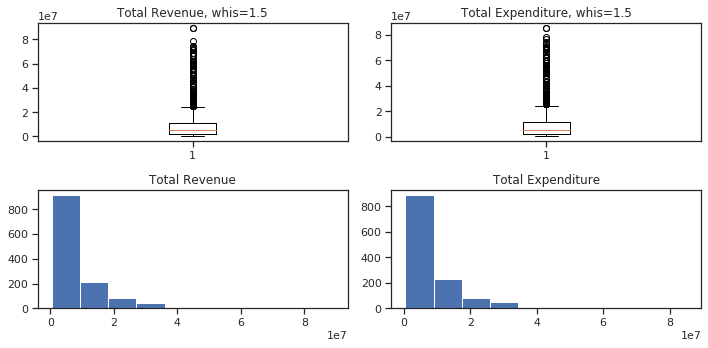

In [579]:
import matplotlib.pyplot as plt

# Detecting outliers visually with boxplots and histograms
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.boxplot(education['TOTAL_REVENUE'])
plt.title("Total Revenue, whis=1.5")

plt.subplot(2,2,2)
plt.boxplot(education['TOTAL_EXPENDITURE'])
plt.title('Total Expenditure, whis=1.5')

plt.subplot(2,2,3)
plt.hist(education['TOTAL_REVENUE'])
plt.title("Total Revenue")

plt.subplot(2,2,4)
plt.hist(education['TOTAL_EXPENDITURE'])
plt.title('Total Expenditure')

plt.tight_layout()
plt.show()

### What do we see?
There are several outliers on the top end of our variables. We'll now employ a statistical outlier detection method to get a better idea.

In [580]:
# Detecting outliers statistically with z-scores

from scipy.stats import zscore

z_scores = zscore(education['TOTAL_REVENUE'])
for threshold in np.arange(1,6,1):
    print('Number of outliers outside {} standard deviation for TOTAL_REVENUE is: {}'.format(threshold, len(np.where(z_scores > threshold)[0])))
    
z_scores2 = zscore(education['TOTAL_EXPENDITURE'])
print('\n')
for threshold in np.arange(1,6,1):
    print('Number of outliers outside {} standard deviation for TOTAL_EXPENDITURE is: {}'.format(threshold, len(np.where(z_scores2 > threshold)[0])))

Number of outliers outside 1 standard deviation for TOTAL_REVENUE is: 138
Number of outliers outside 2 standard deviation for TOTAL_REVENUE is: 53
Number of outliers outside 3 standard deviation for TOTAL_REVENUE is: 40
Number of outliers outside 4 standard deviation for TOTAL_REVENUE is: 24
Number of outliers outside 5 standard deviation for TOTAL_REVENUE is: 8


Number of outliers outside 1 standard deviation for TOTAL_EXPENDITURE is: 138
Number of outliers outside 2 standard deviation for TOTAL_EXPENDITURE is: 53
Number of outliers outside 3 standard deviation for TOTAL_EXPENDITURE is: 39
Number of outliers outside 4 standard deviation for TOTAL_EXPENDITURE is: 25
Number of outliers outside 5 standard deviation for TOTAL_EXPENDITURE is: 8


### What did we detect?

- As expected, the number of outliers decreases the further we drift from the mean.

In [581]:
# Detecting outliers statistically using Tukey's method

q75_tr, q25_tr = np.percentile(education['TOTAL_REVENUE'], [75,25])
iqr_tr =  q75_tr - q25_tr

q75_te, q25_te = np.percentile(education['TOTAL_EXPENDITURE'], [75,25])
iqr_te =  q75_te - q25_te

for threshold in np.arange(1,5,0.5):
    lower_bound = q25_tr - (threshold*iqr_tr)
    upper_bound = q75_tr + (threshold*iqr_tr)
    print('Outliers outside {} time(s) the IQR for TOTAL_REVENUE: {}'.format(threshold, 
                    len((np.where((education['TOTAL_REVENUE'] > upper_bound) | 
                             (education['TOTAL_REVENUE'] < lower_bound))[0]))))

print('----------------------------------------------------------------')

for threshold in np.arange(1,5,0.5):
    lower_bound = q25_te - (threshold*iqr_te)
    upper_bound = q75_te + (threshold*iqr_te)
    print('Outliers outside {} time(s) the IQR for TOTAL_EXPENDITURE: {}'.format(threshold,
                    len((np.where((education['TOTAL_EXPENDITURE'] > upper_bound) | 
                             (education['TOTAL_EXPENDITURE'] < lower_bound))[0]))))

Outliers outside 1.0 time(s) the IQR for TOTAL_REVENUE: 146
Outliers outside 1.5 time(s) the IQR for TOTAL_REVENUE: 110
Outliers outside 2.0 time(s) the IQR for TOTAL_REVENUE: 74
Outliers outside 2.5 time(s) the IQR for TOTAL_REVENUE: 53
Outliers outside 3.0 time(s) the IQR for TOTAL_REVENUE: 47
Outliers outside 3.5 time(s) the IQR for TOTAL_REVENUE: 42
Outliers outside 4.0 time(s) the IQR for TOTAL_REVENUE: 38
Outliers outside 4.5 time(s) the IQR for TOTAL_REVENUE: 31
----------------------------------------------------------------
Outliers outside 1.0 time(s) the IQR for TOTAL_EXPENDITURE: 154
Outliers outside 1.5 time(s) the IQR for TOTAL_EXPENDITURE: 113
Outliers outside 2.0 time(s) the IQR for TOTAL_EXPENDITURE: 77
Outliers outside 2.5 time(s) the IQR for TOTAL_EXPENDITURE: 56
Outliers outside 3.0 time(s) the IQR for TOTAL_EXPENDITURE: 51
Outliers outside 3.5 time(s) the IQR for TOTAL_EXPENDITURE: 44
Outliers outside 4.0 time(s) the IQR for TOTAL_EXPENDITURE: 39
Outliers outside 4

### What did we detect?
Tukey's method has revealed which IQR multiplier ranges contain most of our outliers.

### 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [582]:
# Capping the outliers with the winsoring (one-way, 90th percentile) method
        
from scipy.stats.mstats import winsorize

winsorized_tr = winsorize(education['TOTAL_REVENUE'], limits=(0,0.1))
winsorized_te = winsorize(education['TOTAL_EXPENDITURE'], limits=(0,0.1))

print(winsorized_tr,'\n\n', winsorized_te)

[2678885. 2827391. 2970223. ... 1962874. 2044669. 2044669.] 

 [2653798. 2833433. 3103266. ... 1942406. 2034229. 2034229.]


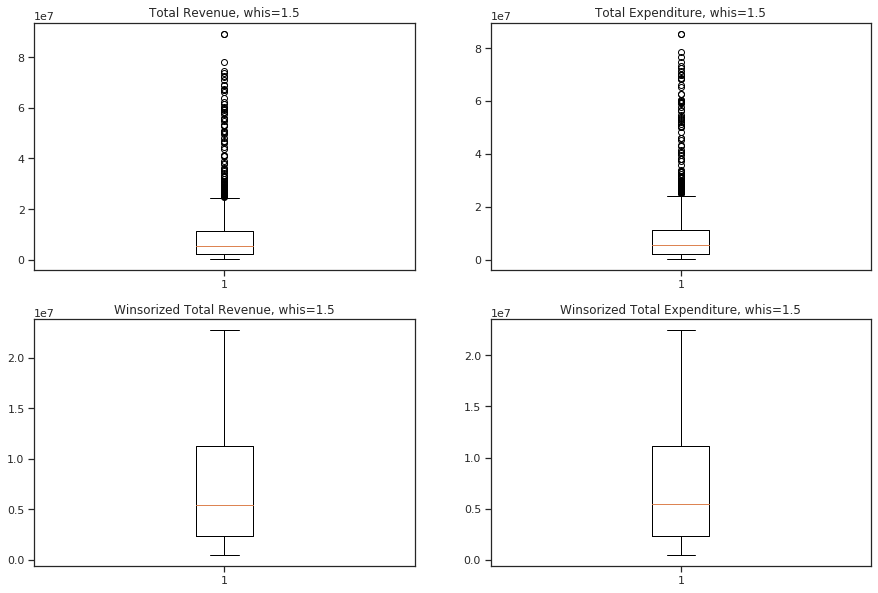

In [583]:

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.boxplot(education['TOTAL_REVENUE'])
plt.title('Total Revenue, whis=1.5')

plt.subplot(2,2,2)
plt.boxplot(education['TOTAL_EXPENDITURE'])
plt.title('Total Expenditure, whis=1.5')

# Winsorized boxplots
plt.subplot(2,2,3)
plt.boxplot(winsorized_tr)
plt.title('Winsorized Total Revenue, whis=1.5')

plt.subplot(2,2,4)
plt.boxplot(winsorized_te)
plt.title('Winsorized Total Expenditure, whis=1.5')
plt.show()

In [584]:
# Confirming the elimination of outliers, statistically, with z-scores

z_scores = zscore(winsorized_tr)
for threshold in np.arange(1,5,1):
    print('Number of outliers outside {} standard deviation for TOTAL_REVENUE is: {}'.format(threshold, len(np.where(z_scores > threshold)[0])))
    
z_scores2 = zscore(winsorized_te)
print('\n')
for threshold in np.arange(1,5,1):
    print('Number of outliers outside {} standard deviation for TOTAL_EXPENDITURE is: {}'.format(threshold, len(np.where(z_scores2 > threshold)[0])))

Number of outliers outside 1 standard deviation for TOTAL_REVENUE is: 230
Number of outliers outside 2 standard deviation for TOTAL_REVENUE is: 137
Number of outliers outside 3 standard deviation for TOTAL_REVENUE is: 0
Number of outliers outside 4 standard deviation for TOTAL_REVENUE is: 0


Number of outliers outside 1 standard deviation for TOTAL_EXPENDITURE is: 234
Number of outliers outside 2 standard deviation for TOTAL_EXPENDITURE is: 139
Number of outliers outside 3 standard deviation for TOTAL_EXPENDITURE is: 0
Number of outliers outside 4 standard deviation for TOTAL_EXPENDITURE is: 0


### What was the effect of winsorizing on the outliers?

- We can see that there are no longer any observations beyond 3 standard deviations from the mean

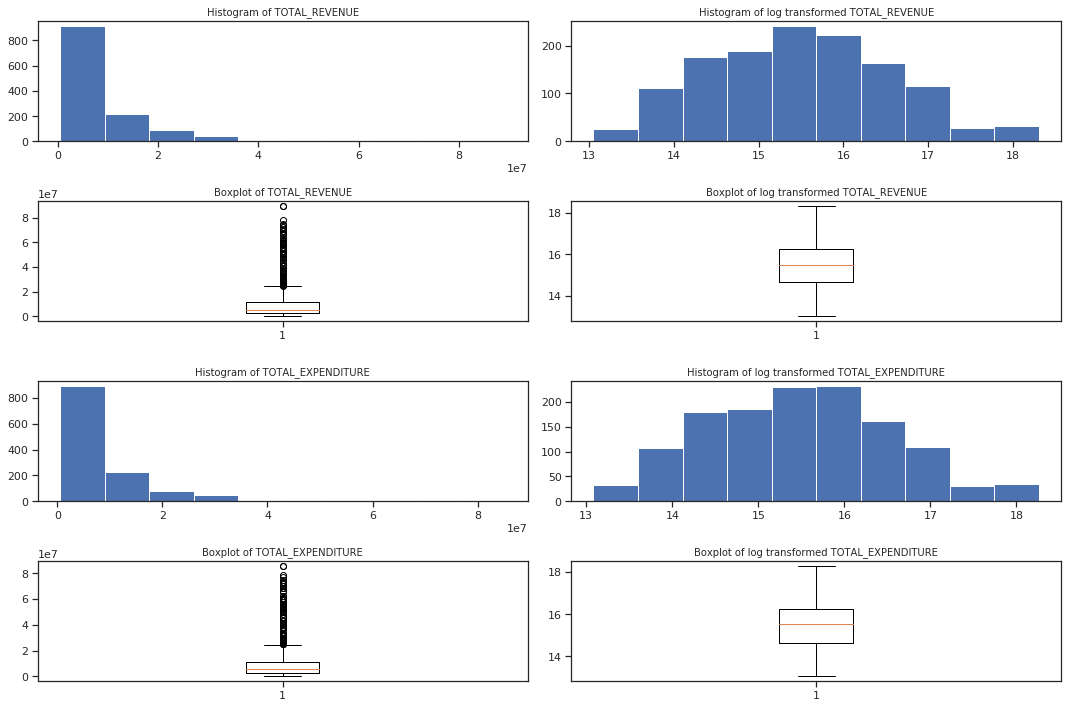

In [585]:
# Using a monotonic, log transformation on the data

plt.figure(figsize=(15,10))

plt.subplot(4,2,1)
plt.hist(education['TOTAL_REVENUE'])
plt.title("Histogram of TOTAL_REVENUE", fontsize=10)

plt.subplot(4,2,2)
plt.hist(np.log(education['TOTAL_REVENUE']))
plt.title("Histogram of log transformed TOTAL_REVENUE", fontsize=10)

plt.subplot(4,2,3)
plt.boxplot(education['TOTAL_REVENUE'])
plt.title("Boxplot of TOTAL_REVENUE", fontsize=10)

plt.subplot(4,2,4)
plt.boxplot(np.log(education['TOTAL_REVENUE']))
plt.title("Boxplot of log transformed TOTAL_REVENUE", fontsize=10)

plt.subplot(4,2,5)
plt.hist(education['TOTAL_EXPENDITURE'])
plt.title("Histogram of TOTAL_EXPENDITURE", fontsize=10)

plt.subplot(4,2,6)
plt.hist(np.log(education['TOTAL_EXPENDITURE']))
plt.title("Histogram of log transformed TOTAL_EXPENDITURE", fontsize=10)

plt.subplot(4,2,7)
plt.boxplot(education['TOTAL_EXPENDITURE'])
plt.title("Boxplot of TOTAL_EXPENDITURE", fontsize=10)

plt.subplot(4,2,8)
plt.boxplot(np.log(education['TOTAL_EXPENDITURE']))
plt.title("Boxplot of log transformed TOTAL_EXPENDITURE", fontsize=10)

plt.tight_layout()
plt.show()

###  What did we detect?
- Visually, it appears as if the log transformations have normalized our observations, and as a result, we no longer have any outliers. Let's confirm this with the Tukey method.

In [586]:
# Using Tukey's method to count outliers after transformation
log_tr = np.log(education['TOTAL_REVENUE'])
log_te = np.log(education['TOTAL_EXPENDITURE'])


q75_ltr, q25_ltr = np.percentile(log_tr, [75,25])
iqr_ltr =  q75_ltr - q25_ltr

q75_lte, q25_lte = np.percentile(log_te, [75,25])
iqr_lte =  q75_lte - q25_lte

for threshold in np.arange(1,5,0.5):
    lower_bound = q25_ltr - (threshold*iqr_ltr)
    upper_bound = q75_ltr + (threshold*iqr_ltr)
    print('Outliers outside {} time(s) the IQR for TOTAL_REVENUE: {}'.format(threshold, 
                    len((np.where((log_tr > upper_bound) | (log_tr < lower_bound))[0]))))
print('----------------------------------------------------------------')

for threshold in np.arange(1,5,0.5):
    lower_bound = q25_lte - (threshold*iqr_lte)
    upper_bound = q75_lte + (threshold*iqr_lte)
    print('Outliers outside {} time(s) the IQR for TOTAL_EXPENDITURE: {}'.format(threshold,
                    len((np.where((log_te > upper_bound) | (log_te < lower_bound))[0]))))

Outliers outside 1.0 time(s) the IQR for TOTAL_REVENUE: 29
Outliers outside 1.5 time(s) the IQR for TOTAL_REVENUE: 0
Outliers outside 2.0 time(s) the IQR for TOTAL_REVENUE: 0
Outliers outside 2.5 time(s) the IQR for TOTAL_REVENUE: 0
Outliers outside 3.0 time(s) the IQR for TOTAL_REVENUE: 0
Outliers outside 3.5 time(s) the IQR for TOTAL_REVENUE: 0
Outliers outside 4.0 time(s) the IQR for TOTAL_REVENUE: 0
Outliers outside 4.5 time(s) the IQR for TOTAL_REVENUE: 0
----------------------------------------------------------------
Outliers outside 1.0 time(s) the IQR for TOTAL_EXPENDITURE: 32
Outliers outside 1.5 time(s) the IQR for TOTAL_EXPENDITURE: 0
Outliers outside 2.0 time(s) the IQR for TOTAL_EXPENDITURE: 0
Outliers outside 2.5 time(s) the IQR for TOTAL_EXPENDITURE: 0
Outliers outside 3.0 time(s) the IQR for TOTAL_EXPENDITURE: 0
Outliers outside 3.5 time(s) the IQR for TOTAL_EXPENDITURE: 0
Outliers outside 4.0 time(s) the IQR for TOTAL_EXPENDITURE: 0
Outliers outside 4.5 time(s) the IQ

### 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [587]:
education["TOTAL_SURPLUS"] = education['TOTAL_REVENUE'] - education['TOTAL_EXPENDITURE']
education['TOTAL_SURPLUS'].describe()

count    1.302000e+03
mean    -9.858269e+04
std      5.857918e+05
min     -5.487742e+06
25%     -1.839852e+05
50%     -2.272900e+04
75%      5.858950e+04
max      3.897129e+06
Name: TOTAL_SURPLUS, dtype: float64

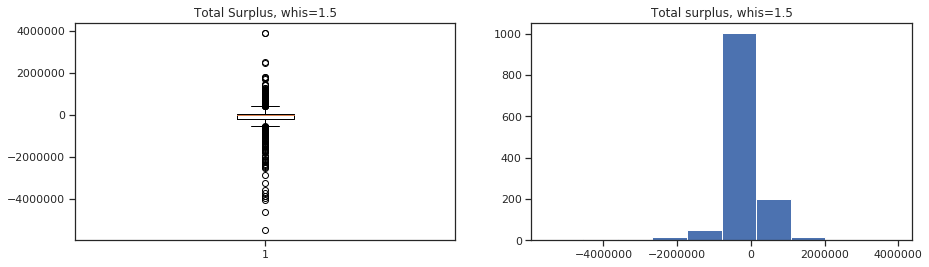

In [588]:
# Visual outlier detection
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.boxplot(education['TOTAL_SURPLUS'])
plt.title("Total Surplus, whis=1.5")

plt.subplot(1,2,2)
plt.hist(education['TOTAL_SURPLUS'])
plt.title('Total surplus, whis=1.5')
plt.show()

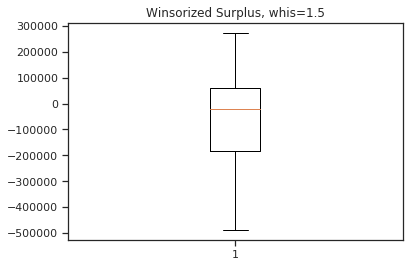

In [589]:
# Winsorized outlier detection
winsorized_surplus = winsorize(education['TOTAL_SURPLUS'], limits=(0.1,0.1))

plt.boxplot(winsorized_surplus)
plt.title('Winsorized Surplus, whis=1.5')
plt.show()

### Any issues?

Winsorizing at these limits requires us to replace the bottom 10th percentile of values in order to remove all outliers. I suspect that a non-symmetric replacement of values, plus the sheer amount of replacements, might render the modified data useless as a predictor of the real world values the data was sampled from, thus invalidating any subsequent statistical analyses. There has to be a limit to how much we winsorize, isn't there?

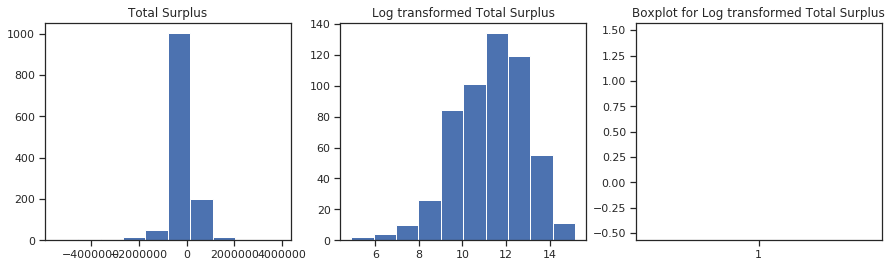

In [590]:
# Monotonic, log transformation
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.hist(education['TOTAL_SURPLUS'])
plt.title('Total Surplus')

plt.subplot(1,3,2)
plt.hist(np.log(education['TOTAL_SURPLUS']))
plt.title('Log transformed Total Surplus')

plt.subplot(1,3,3)
plt.boxplot(np.log(education['TOTAL_SURPLUS']))
plt.title('Boxplot for Log transformed Total Surplus')
plt.show()

Something seems to be wrong with the log transform method. When we investigate further, we see that logarithmic transformations have turned negative values into 'nan' values (see below). So as the visual methods seemed to have normalized the values, it's the statistical methods that show why the boxplot didn't appear.

In [591]:
np.log(education['TOTAL_SURPLUS']).head()

0      10.130105
52           NaN
104          NaN
157     9.552084
209          NaN
Name: TOTAL_SURPLUS, dtype: float64

### Did the log transformations eliminate outliers?
- Yes, along with several other values. Log transformations appear to be useful only for one-way, positive outliers.

### 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

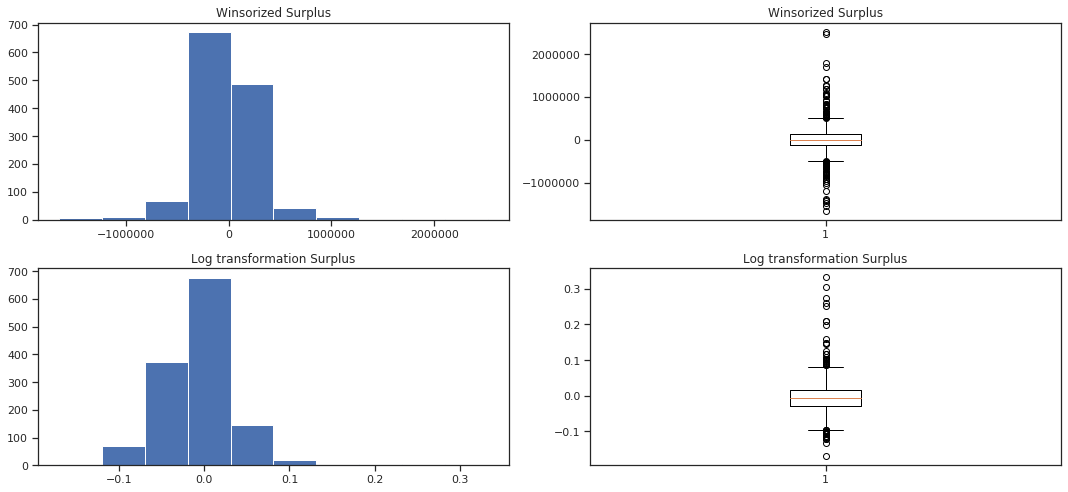

In [592]:
# The difference between outlier-eliminated variables
winsorized_surplus = winsorized_tr - winsorized_te
log_surplus = log_tr - log_te

plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
plt.hist(winsorized_surplus)
plt.title('Winsorized Surplus')

plt.subplot(2,2,2)
plt.boxplot(winsorized_surplus)
plt.title('Winsorized Surplus')

plt.subplot(2,2,3)
plt.hist(log_surplus)
plt.title('Log transformation Surplus')

plt.subplot(2,2,4)
plt.boxplot(log_surplus)
plt.title('Log transformation Surplus')

plt.tight_layout()
plt.show()

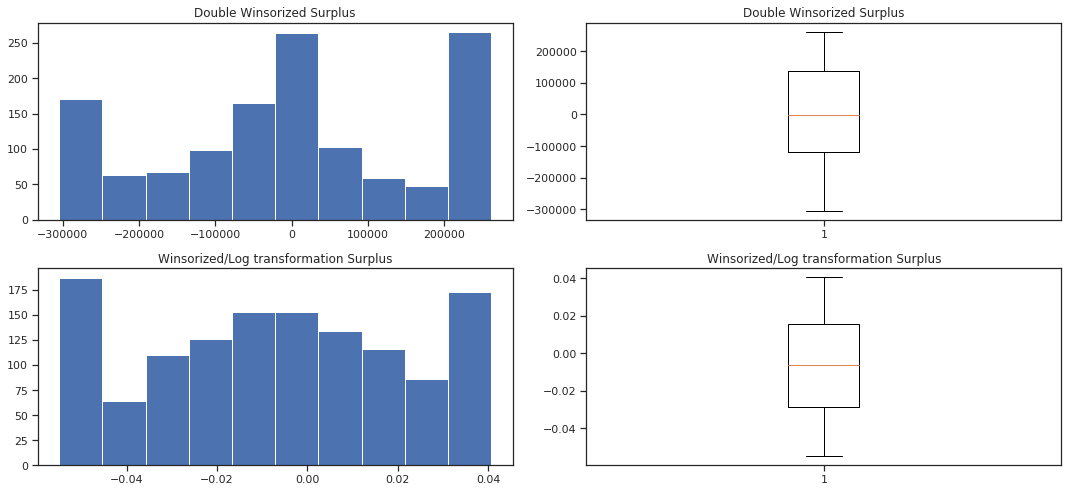

In [593]:
# Winsorizing the outlier-eliminated TOTAL_SURPLUS differences to eliminate outliers

# winsorizing the winsorized difference
double_win_surplus = winsorize(winsorized_surplus, limits=(0.1,0.1))
# winsorizing the log transformed difference
win_log_surplus = winsorize(log_surplus, limits=(0.1,0.1))


plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
plt.hist(double_win_surplus)
plt.title('Double Winsorized Surplus')

plt.subplot(2,2,2)
plt.boxplot(double_win_surplus)
plt.title('Double Winsorized Surplus')

plt.subplot(2,2,3)
plt.hist(win_log_surplus)
plt.title('Winsorized/Log transformation Surplus')

plt.subplot(2,2,4)
plt.boxplot(win_log_surplus)
plt.title('Winsorized/Log transformation Surplus')

plt.tight_layout()
plt.show()

### 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [594]:
# Comparing pre- and post-windsorized 'winsorized_tr - winsorized_te' outliers

z_scores = zscore(winsorized_surplus)
for threshold in np.arange(1,5,1):
    print("# of outliers outside {} std. dev. for pre-windsorized 'winsorized_tr - winsorized_te' is: {}".format(threshold, len(np.where(z_scores > threshold)[0])))
print('--------------------------------------------------------------------------')    
z_scores2 = zscore(double_win_surplus)
for threshold in np.arange(1,5,1):
    print("# of outliers outside {} std. dev. for post-windsorized 'winsorized_tr - winsorized_te' is: {}".format(threshold, len(np.where(z_scores2 > threshold)[0])))
    
print('\n')
# Comparing pre- and post-windsorized 'log_tr - log_te' outliers

z_scores3 = zscore(log_surplus)
for threshold in np.arange(1,5,1):
    print("# of outliers outside {} std. dev. for pre-windsorized 'log_tr - log_te' is: {}".format(threshold, len(np.where(z_scores > threshold)[0])))
print('--------------------------------------------------------------------------')    
z_scores4 = zscore(win_log_surplus)
for threshold in np.arange(1,5,1):
    print("# of outliers outside {} std. dev. for post-windsorized 'log_tr - log_te' is: {}".format(threshold, len(np.where(z_scores2 > threshold)[0])))

# of outliers outside 1 std. dev. for pre-windsorized 'winsorized_tr - winsorized_te' is: 91
# of outliers outside 2 std. dev. for pre-windsorized 'winsorized_tr - winsorized_te' is: 29
# of outliers outside 3 std. dev. for pre-windsorized 'winsorized_tr - winsorized_te' is: 15
# of outliers outside 4 std. dev. for pre-windsorized 'winsorized_tr - winsorized_te' is: 7
--------------------------------------------------------------------------
# of outliers outside 1 std. dev. for post-windsorized 'winsorized_tr - winsorized_te' is: 285
# of outliers outside 2 std. dev. for post-windsorized 'winsorized_tr - winsorized_te' is: 0
# of outliers outside 3 std. dev. for post-windsorized 'winsorized_tr - winsorized_te' is: 0
# of outliers outside 4 std. dev. for post-windsorized 'winsorized_tr - winsorized_te' is: 0


# of outliers outside 1 std. dev. for pre-windsorized 'log_tr - log_te' is: 91
# of outliers outside 2 std. dev. for pre-windsorized 'log_tr - log_te' is: 29
# of outliers outsid

### Any outlier changes?

- There is a clear reduction in outliers the further we drift from the mean of the ' outlier eliminated differences' and it appears winsorizing both differences ultimately leads to the same outlier reduction.

### 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

 - The method in the question 3 works fine if you winsorize, but is not adequate for logarithmic transformation due to the negative values the transformation creates. For ultimate flexibility, the method used in question 4 works best because it does not self-destruct when working with negative values.

> # Data exploration 1

### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [595]:
education.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_SURPLUS
count,1302.000000,1.302000e+03,1.302000e+03,1.302000e+03,1.302000e+03,1.302000e+03,1.302000e+03,1.302000e+03,1.302000e+03,1.302000e+03,...,1302.000000,1302.000000,1.302000e+03,1.302000e+03,1.302000e+03,1302.000000,1302.000000,1302.000000,1302.000000,1.302000e+03
mean,2004.505376,9.319447e+05,9.439210e+06,7.924378e+05,4.389512e+06,4.257261e+06,9.537793e+06,4.947208e+06,2.779897e+06,4.369942e+05,...,71842.368664,61409.589862,5.802968e+05,2.776407e+05,8.778007e+05,233.248932,277.999650,218.981313,263.047820,-9.858269e+04
std,7.498371,1.067159e+06,1.208176e+07,1.164749e+06,5.703368e+06,5.654673e+06,1.228891e+07,6.473876e+06,3.440056e+06,5.397107e+05,...,81402.945023,70941.163266,6.643116e+05,3.187961e+05,1.007020e+06,9.777394,9.115611,6.851556,6.113919,5.857918e+05
min,1992.000000,8.414600e+04,4.656500e+05,3.102000e+04,8.361300e+04,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,1485.000000,484.000000,1.922600e+04,2.758000e+03,2.455400e+04,201.828261,246.458035,196.762268,236.379102,-5.487742e+06
25%,1998.000000,2.813672e+05,2.355495e+06,1.993992e+05,1.248743e+06,7.386595e+05,2.320778e+06,1.255821e+06,7.089602e+05,1.103598e+05,...,21129.250000,18432.000000,1.688525e+05,8.192700e+04,2.613500e+05,226.654954,272.219082,214.810614,259.423411,-1.839852e+05
50%,2005.000000,6.616585e+05,5.375440e+06,4.268290e+05,2.660399e+06,2.157068e+06,5.483856e+06,2.792698e+06,1.580444e+06,2.750790e+05,...,50291.000000,40662.000000,4.102680e+05,1.866270e+05,6.216535e+05,234.809688,279.253243,220.217617,264.192675,-2.272900e+04
75%,2011.000000,1.025345e+06,1.124721e+07,8.566772e+05,5.346950e+06,4.942642e+06,1.113124e+07,5.711667e+06,3.343750e+06,5.264548e+05,...,80868.000000,71622.750000,6.512758e+05,3.163695e+05,9.744405e+05,240.967465,284.227100,223.838822,267.401262,5.858950e+04
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130,3.897129e+06


1. The average math and reading scores make significant improvements between 4th and 8th grade.
2. The reading standard deviations are smaller than the math standard deviations. SDs also get a bit smaller from 4th to 8th grade, for both subjects.
3. Average math scores are higher than average reading scores.
4. The average TOTAL_REVENUE is less than TOTAL_EXPENDITURE indicating deficit spending on average. (also seen by there being a negative value in mean TOTAL_SURPLUS).
5. INSTRUCTION_EXPENDITURE is nearly double	SUPPORT_SERVICES_EXPENDITURE


### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

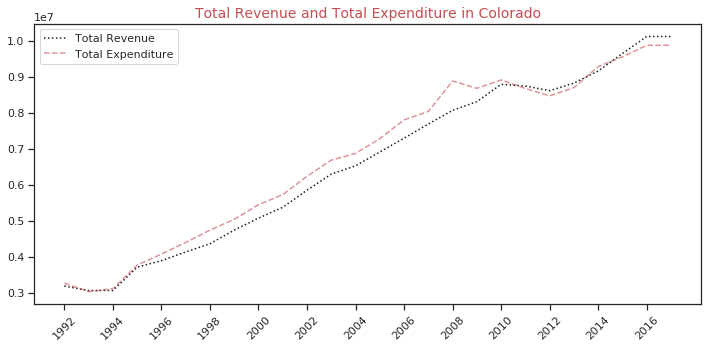

In [596]:
plt.figure(figsize=(10,5))
plt.plot(education[education['STATE'] == 'COLORADO']['YEAR'], 
         education[education['STATE'] == 'COLORADO']['TOTAL_REVENUE'], color='k', linestyle=':')
plt.plot(education[education['STATE'] == 'COLORADO']['YEAR'], 
         education[education['STATE'] == 'COLORADO']['TOTAL_EXPENDITURE'], color='r', linestyle='--', alpha=.6)
plt.xticks(np.arange(1992, 2018, step=2), rotation=45)
plt.legend(['Total Revenue','Total Expenditure'])
plt.title('Total Revenue and Total Expenditure in Colorado', fontsize=14, color='r')

plt.tight_layout()
plt.show()

> For the 2010-2011 Budget: (Source: https://ballotpedia.org/Colorado_state_budget_(2010-2011))

"Highlights of the budget included: A $260 million, or a 6 percent, cut to aid for public schools, a move that districts said would result in teacher layoffs and larger class sizes."

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

In the state of Colorado, the students are more successful in math, every year, for both 4th and 8th grade, as the following graph illustrates.

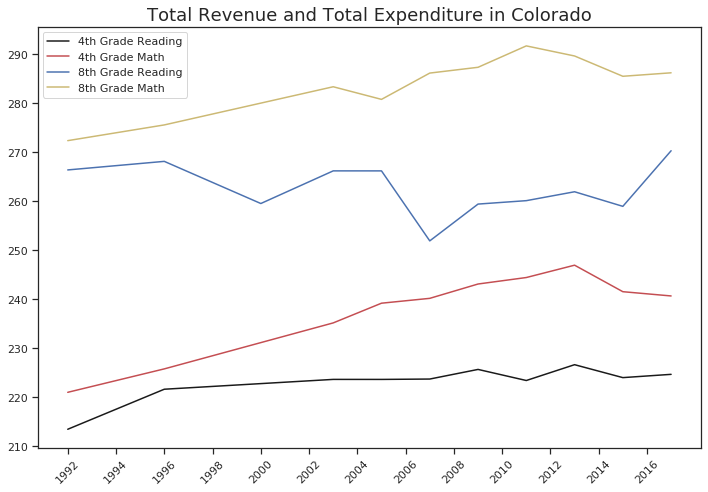

4th & 8th grade score differences 
 ----------------------------------------
      YEAR  4th grade difference  8th grade difference
5     1992              7.542539              5.978746
57    1993              6.695058              6.344074
109   1994              5.847577              6.709403
162   1995              5.000095              7.074731
214   1996              4.152614              7.440060
265   1997              5.206831             10.704131
317   1998              6.261049             13.968202
368   1999              7.315266             17.232273
421   2000              8.369483             20.496344
473   2001              9.423700             19.387996
525   2002             10.477917             18.279647
577   2003             11.532134             17.171298
629   2004             13.545939             15.884881
681   2005             15.559744             14.598464
732   2006             16.016491             24.427169
785   2007             16.473237           

In [597]:
plt.figure(figsize=(10,7))
plt.plot(education[education['STATE'] == 'COLORADO']['YEAR'], 
         education[education['STATE'] == 'COLORADO']['AVG_READING_4_SCORE'], color='k', label='4th Grade Reading')
plt.plot(education[education['STATE'] == 'COLORADO']['YEAR'], 
         education[education['STATE'] == 'COLORADO']['AVG_MATH_4_SCORE'], color='r',label='4th Grade Math')
plt.plot(education[education['STATE'] == 'COLORADO']['YEAR'], 
         education[education['STATE'] == 'COLORADO']['AVG_READING_8_SCORE'], color='b', label='8th Grade Reading')
plt.plot(education[education['STATE'] == 'COLORADO']['YEAR'], 
         education[education['STATE'] == 'COLORADO']['AVG_MATH_8_SCORE'], color='y', label='8th Grade Math')
plt.xticks(np.arange(1992, 2018, step=2), rotation=45)
plt.legend()
plt.title('Total Revenue and Total Expenditure in Colorado', fontsize=18)

plt.tight_layout()
plt.show()

education['4th grade difference'] = education['AVG_MATH_4_SCORE'] - education['AVG_READING_4_SCORE']
education['8th grade difference'] = education['AVG_MATH_8_SCORE'] - education['AVG_READING_8_SCORE']

print('4th & 8th grade score differences','\n','----------------------------------------')
print(education[education['STATE'] == 'COLORADO'][['YEAR','4th grade difference', '8th grade difference']])

del education['4th grade difference']
del education['8th grade difference']

### 4. What are the distributions of the math and reading scores in the sample?

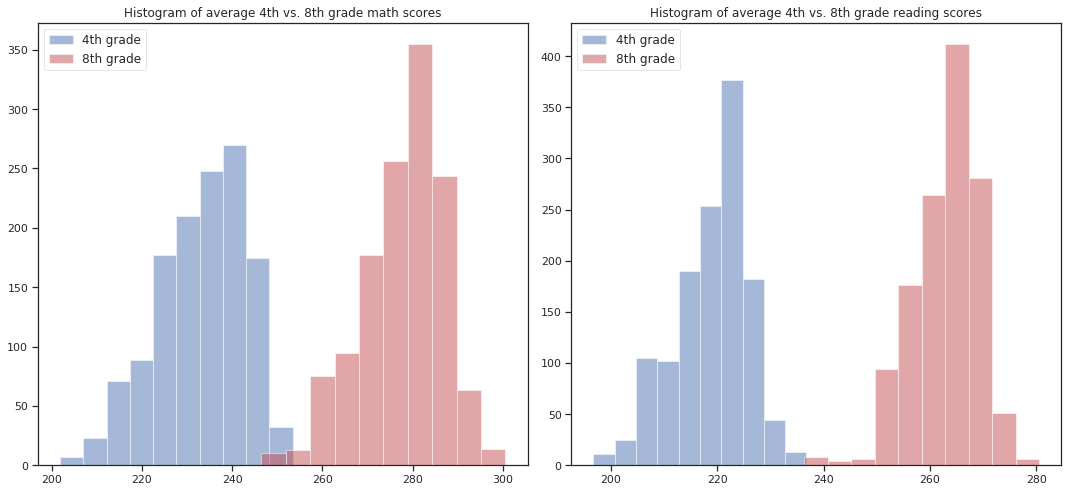

In [598]:
plt.figure(figsize=(15,7))

# histograms of the original data
plt.subplot(1, 2, 1)
plt.hist(education['AVG_MATH_4_SCORE'], alpha=0.5)
plt.hist(education['AVG_MATH_8_SCORE'], alpha=0.5, color='r')
plt.legend(['4th grade','8th grade'], fontsize=12, framealpha=0.5)
plt.title("Histogram of average 4th vs. 8th grade math scores")

plt.subplot(1, 2, 2)
plt.hist(education['AVG_READING_4_SCORE'], alpha=0.5)
plt.hist(education['AVG_READING_8_SCORE'], alpha=0.5, color='r')
plt.legend(['4th grade','8th grade'], fontsize=12, framealpha=0.5)
plt.title("Histogram of average 4th vs. 8th grade reading scores")

plt.tight_layout()
plt.show()

> Both the math and reading scores have a normal distribution, for both grades 4 and 8.

### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [599]:
education.isnull().sum()*100/education.shape[0]

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
TOTAL_SURPLUS                   0.0
dtype: float64

# ^^^ No missing values in my data!

The result shown above are with my missing values having already been filled in with interpolation.

> #  Data exploration 2

In [602]:
from scipy.stats.stats import ttest_ind

postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [603]:
student.groupby("parental level of education").mean().sort_values('math score')

,math score,reading score,writing score
parental level of education,,,
high school,62.137755,64.704082,62.448980
some high school,63.497207,66.938547,64.888268
some college,67.128319,69.460177,68.840708
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
master's degree,69.745763,75.372881,75.677966


In [607]:
# Test whether group differences are significant.
parental_education = student["parental level of education"].unique()
grouped_df = student.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(parental_education)):
        for j in range(i+1, len(parental_education)):
            print("t-test between groups '{}' and '{}':".format(parental_education[i], parental_education[j]))
            print(' p-value <= 0.05?: ', ttest_ind(student[student["parental level of education"]==parental_education[i]][var], 
                            student[student["parental level of education"]==parental_education[j]][var])[1] <= 0.05)

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups 'bachelor's degree' and 'some college':
 p-value <= 0.05?:  False
t-test between groups 'bachelor's degree' and 'master's degree':
 p-value <= 0.05?:  False
t-test between groups 'bachelor's degree' and 'associate's degree':
 p-value <= 0.05?:  False
t-test between groups 'bachelor's degree' and 'high school':
 p-value <= 0.05?:  True
t-test between groups 'bachelor's degree' and 'some high school':
 p-value <= 0.05?:  True
t-test between groups 'some college' and 'master's degree':
 p-value <= 0.05?:  False
t-test between groups 'some college' and 'associate's degree':
 p-value <= 0.05?:  False
t-test between groups 'some college' and 'high school':
 p-value <= 0.05?:  True
t-test between groups 'some college' and 'some high school':
 p-value <= 0.05?:  True
t-test between groups 'master's degree' and 'associate's degree':
 p-valu

## Parental Level of Education:
+ There is a general upward trend in scores with higher parental education attainment (the lone exception being the math scores for 'high school' vs. 'some high school'. Statistical significance varies across different combinations of parental education level, especially in regards to writing score.

In [608]:
student.groupby("gender").mean().sort_values('math score')

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [609]:
student.groupby("gender").corr()

math score  reading score  writing score
gender                                                        
female math score       1.000000       0.909254       0.920729
       reading score    0.909254       1.000000       0.954725
       writing score    0.920729       0.954725       1.000000
male   math score       1.000000       0.885489       0.891973
       reading score    0.885489       1.000000       0.950627
       writing score    0.891973       0.950627       1.000000

In [610]:
ttest_ind(student[student['gender'] == 'female'][["math score", "reading score", "writing score"]], 
          student[student['gender'] == 'male'][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

## Gender:

+ Males score higher in math, females score higher in the language scores of reading and writing. All differences across test scores are statistically significant according to our t-test. When we examine correlations within genders, we see that math correlates with reading and writing more for females than it does for males, perhaps indicating that females draw more upon their reading acumen to learn, or test in, math.

In [612]:
# Test whether group differences are significant.
race_ethnicity = student["race/ethnicity"].unique()
grouped_df = student.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(race_ethnicity)):
        for j in range(i+1, len(race_ethnicity)):
            print("t-test between groups '{}' and '{}':".format(race_ethnicity[i], race_ethnicity[j]))
            print(' p-value <= 0.05?: ', ttest_ind(student[student["race/ethnicity"]==race_ethnicity[i]][var], 
                            student[student["race/ethnicity"]==race_ethnicity[j]][var])[1] <= 0.05)

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups 'group B' and 'group C':
 p-value <= 0.05?:  False
t-test between groups 'group B' and 'group A':
 p-value <= 0.05?:  False
t-test between groups 'group B' and 'group D':
 p-value <= 0.05?:  True
t-test between groups 'group B' and 'group E':
 p-value <= 0.05?:  True
t-test between groups 'group C' and 'group A':
 p-value <= 0.05?:  False
t-test between groups 'group C' and 'group D':
 p-value <= 0.05?:  True
t-test between groups 'group C' and 'group E':
 p-value <= 0.05?:  True
t-test between groups 'group A' and 'group D':
 p-value <= 0.05?:  True
t-test between groups 'group A' and 'group E':
 p-value <= 0.05?:  True
t-test between groups 'group D' and 'group E':
 p-value <= 0.05?:  True
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-te

## Race/Ethnicity:
+ Scores increase, across the board, alphabetically from group A to group E. Statistical significance varies from one group and one test to the next.

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [613]:
student.groupby("lunch").mean().sort_values('math score')

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [614]:
# testing for statistical significance between 'free'reduced' lunches and 'standard' lunches
ttest_ind(student[student['lunch'] == 'free/reduced'][["math score", "reading score", "writing score"]], 
          student[student['lunch'] == 'standard'][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

+ There is a clear difference in test scores between 'free/reduced' lunches and standard lunches, with standard lunches scoring considerably higher across the board. These differences are statistically significant across the board.

> As a proxy for wealth. it is possible that the 'free/reduced' lunch programs represent students from disadvantaged homes; disadvantages which might negatively impact their test scores (eg. lack of test prep, nourishment, or perhaps parental education(see below)).

In [615]:
# testing for statistical significance between 'free'reduced' lunches and completed test prep

########## Talk this over with Hobson ##########

ttest_ind(student[student['lunch'] == 'free/reduced'][["math score", "reading score", "writing score"]], 
          student[student['test preparation course'] == 'completed'][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ -9.71609385,  -8.64031818, -10.53913079]), pvalue=array([4.88573191e-21, 3.68137532e-17, 3.13066633e-24]))

### 3. Does the test preparation course seem to have an effect on the exam performances?

In [616]:
student.groupby("test preparation course").mean().sort_values('math score')

,math score,reading score,writing score
test preparation course,,,
none,64.077882,66.534268,64.504673
completed,69.695531,73.893855,74.418994


+ Test preparation courses seem to help increase test scores across the board.

### 4. Which 2 exam scores are most correlated with each other?

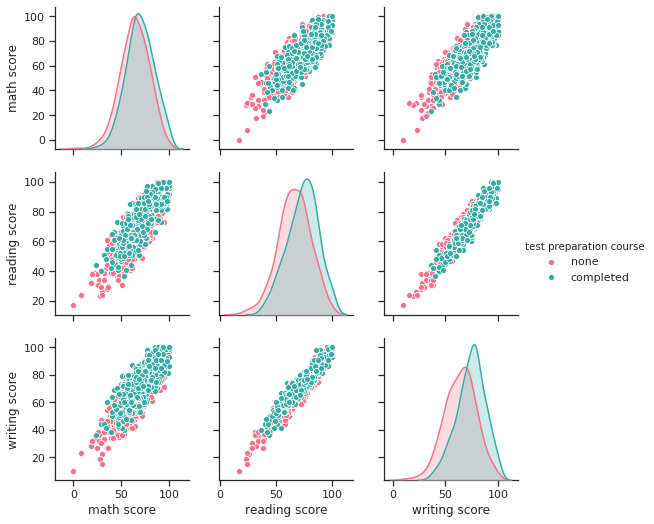

In [617]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(student, hue="test preparation course", palette="husl")
plt.show()

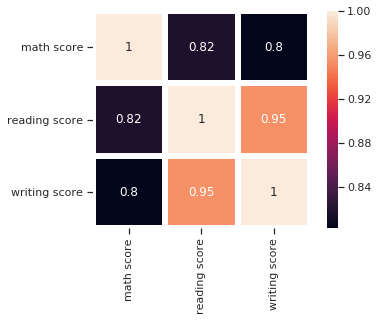

In [618]:
# make the correlation matrices.
corrmat_student = student.corr()

sns.heatmap(corrmat_student, square=True, annot=True, linewidths=5)
plt.show()

+ Both the pairplot and the heatmap confirm, visually and statistically respectively, that reading scores correlate most with writing scores.

### The following is some extracurricular exploration  of race/ethnicity and test preparation prevalence.

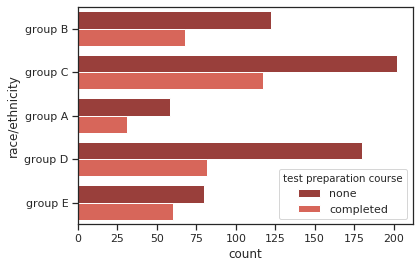

In [619]:
sns.countplot(y="race/ethnicity", hue="test preparation course", data=student, palette="Reds_d")
plt.show()

In [620]:
for race in student['race/ethnicity'].unique():
    a = student[student['race/ethnicity'] == race][student['test preparation course']=='completed'].shape[0]
    b = student[student['race/ethnicity'] == race].shape[0]
    percent =  a/b
    print('{}: {}'.format(race, percent*100))
    print('------------------------------')

group B: 35.78947368421053
------------------------------
group C: 36.677115987460816
------------------------------
group A: 34.831460674157306
------------------------------
group D: 31.297709923664126
------------------------------
group E: 42.857142857142854
------------------------------


> # Feature engineering 1: From variables to features

### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

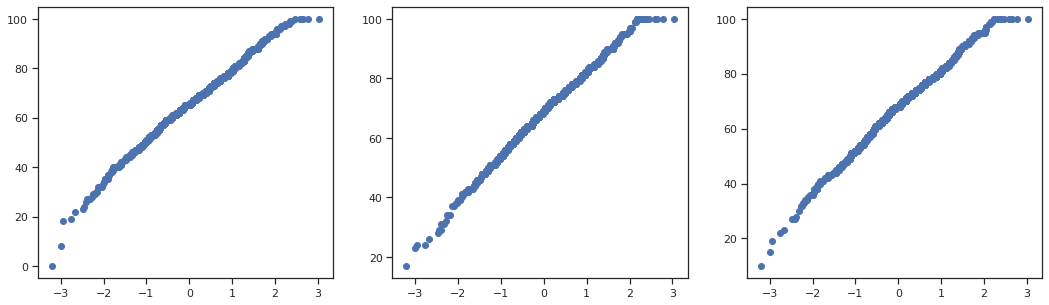

In [622]:
# Checking for normality, visually using a qq plot
norm = np.random.normal(0, 1, len(student))

# Sorting the values in ascending order.
norm.sort()

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(norm, student['math score'].sort_values())

plt.subplot(1,3,2)
plt.scatter(norm, student['reading score'].sort_values())

plt.subplot(1,3,3)
plt.scatter(norm, student['writing score'].sort_values())
plt.show()

+ We clearly notice something approaching normality via our visual, qq-plot method, let's confirm this using the Jarque-Bera and Normal tests from scipy.

In [624]:
# statistically verifying whether the distributions of the variables 
# follow the normal distribution

from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(student["math score"])
norm_stats = normaltest(student["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student["reading score"])
norm_stats = normaltest(student["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student["writing score"])
norm_stats = normaltest(student["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


+ The low p-values indicate that the distribution of the variables is statistically different from the normal distribution, with the Jarque-Bera test detecting lower probabilities of normal distributions than the 'normal' test.

We'll now apply scipy's BoxCox transformation to see if our distributions change.

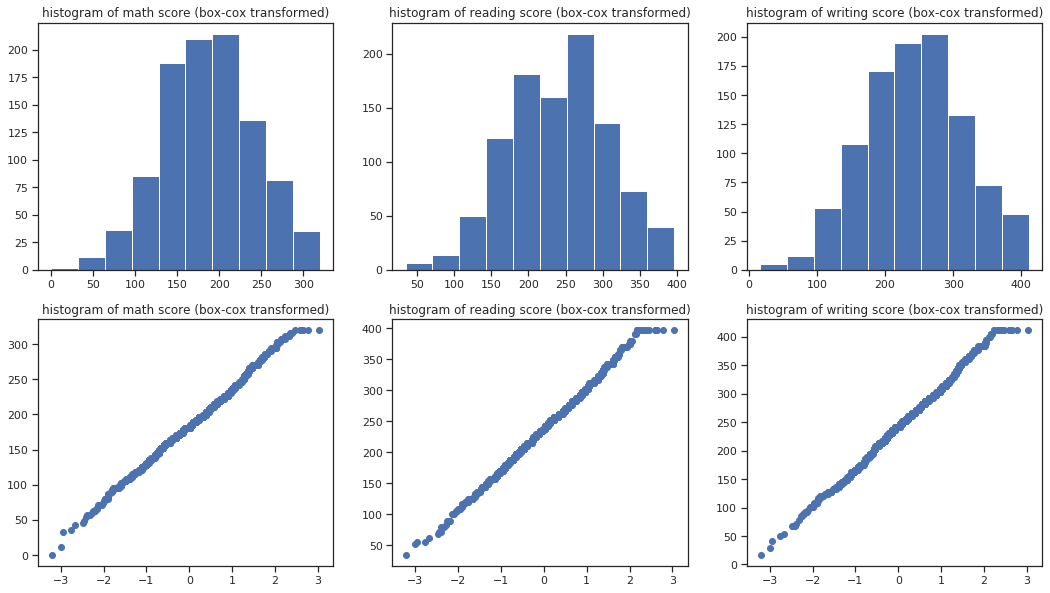

In [626]:
from scipy.stats import boxcox

math_score_boxcox,_ = boxcox(student["math score"].replace(0,1))
reading_score_boxcox,_ = boxcox(student["reading score"])
writing_score_boxcox,_ = boxcox(student["writing score"])

plt.figure(figsize=(18,10))

# histograms of the box-cox transformed data
plt.subplot(2, 3, 1)
plt.hist(math_score_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(2, 3, 2)
plt.hist(reading_score_boxcox)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(2, 3, 3)
plt.hist(writing_score_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

# qq-plots of the transformed data
plt.subplot(2, 3, 4)
plt.scatter(norm, np.sort(math_score_boxcox))
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(2, 3, 5)
plt.scatter(norm, np.sort(reading_score_boxcox))
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(2, 3, 6)
plt.scatter(norm, np.sort(writing_score_boxcox))
plt.title("histogram of writing score (box-cox transformed)")

plt.show()

+ If we were to judge solely from the histograms, we might feel compelled to conclude that the distributions are now normal. They look that way after all. Additional confirmation comes via our qq-plots which show the desired positive slope of sorted data points. We can use statistical methods to confirm further (see below).

In [627]:
# statistically verifying whether the distributions of the variables 
# follow the normal distribution

jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 0.9589872977598923 and p value is 0.6190967928084308
Normality test statistics is 0.9034195001197268 and p value is 0.6365388982921865
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


+ Since the JB and Normality tests' null hypotheses are that our sample is from a normal distribution, if we had set our confidence level at α=5%, we would fail to reject the null hypothesis (the boxcox transformed distributions are normal) in all but our final, 'Normality test' for the writing scores.

> Although our distributions are not strictly normal, they are 'more normal' than they were before, as the normality tests indicate. Therefore, they might be sufficient for machine learning models where normaloity is assumed.

### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

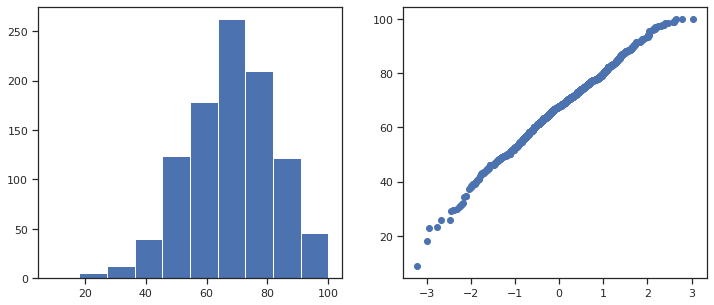

JB p-value = 0.00044089934264401887
Normality test p-value = 0.0005037851534494478


In [629]:
avg_exam_scores = (student['math score'] + student['reading score'] + student['writing score'])/3

student['avg_exam_scores'] = avg_exam_scores

plt.figure(figsize=(12,5))

# Checking for normality, visually
plt.subplot(1, 2, 1)
plt.hist(student['avg_exam_scores'])

plt.subplot(1, 2, 2)
plt.scatter(norm, student['avg_exam_scores'].sort_values())
plt.show()

# Checking for normality statistically
jb_stats = jarque_bera(student['avg_exam_scores'])
norm_stats = normaltest(student['avg_exam_scores'])

print('JB p-value = {}\nNormality test p-value = {}'.format(jb_stats[1], norm_stats[1]))

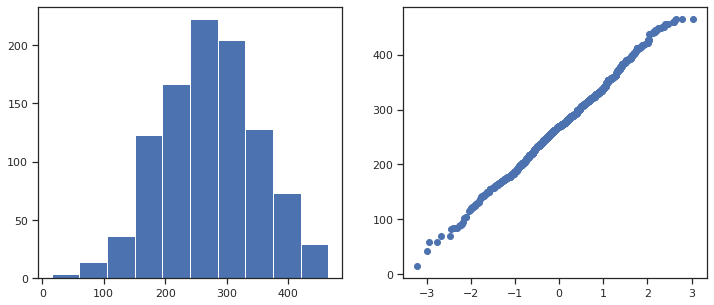

JB p-value = 0.2959101356398447
Normality test p-value = 0.24909303914726724


In [631]:
# Applying a boxcox transformation on the weighted exam scores

weighted_scores,_ = boxcox(student['avg_exam_scores'])

plt.figure(figsize=(12,5))

# Checking for normality, visually
plt.subplot(1, 2, 1)
plt.hist(weighted_scores)

plt.subplot(1, 2, 2)
plt.scatter(norm, np.sort(weighted_scores))
plt.show()

# Checking for normality statistically
jb_stats = jarque_bera(weighted_scores)
norm_stats = normaltest(weighted_scores)

print('JB p-value = {}\nNormality test p-value = {}'.format(jb_stats[1], norm_stats[1]))

+ Both the JB and Normality tests indicate our data in 'more' normal after the boxcox transformation, as their respective p-values indicate, if we were to fail to reject normality at α=5%.

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

All of them although the lunch variable might better be understood as a proxy for some other variable.

# Feature engineering 2: dimensionality and PCA

Say, we want to understand the relationship between the expenditures of the governments and the students' overall success in the math and reading.

### 1. Create a new score variable from the weighted averages of all score variables in the datasets. Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!.

In [639]:
g4_percent = education['GRADES_4_G']/(education['GRADES_4_G'] + education['GRADES_8_G'])
g8_percent = 1 - g4_percent

g4_avg_score = (education['AVG_MATH_4_SCORE'] + education['AVG_READING_4_SCORE'])/2
g8_avg_score = (education['AVG_MATH_8_SCORE'] + education['AVG_READING_8_SCORE'])/2

education['AVG_SCORES'] = (g4_percent * g4_avg_score) + (g8_percent * g8_avg_score)

In [650]:
education.iloc[:5,-1]

0      232.204803
52     233.367062
104    234.015532
157    234.889785
209    235.106342
Name: AVG_SCORES, dtype: float64

### 2. What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?

In [690]:
education_df = education.iloc[:,[-1, 8, 9, 10, 11, 12]]
education_df.corr()

,AVG_SCORES,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
AVG_SCORES,1.000000,0.094051,0.100969,0.102374,0.017279,0.025425
TOTAL_EXPENDITURE,0.094051,1.000000,0.991142,0.992976,0.945068,0.930017
INSTRUCTION_EXPENDITURE,0.100969,0.991142,1.000000,0.975980,0.907491,0.892688
SUPPORT_SERVICES_EXPENDITURE,0.102374,0.992976,0.975980,1.000000,0.952709,0.914641
OTHER_EXPENDITURE,0.017279,0.945068,0.907491,0.952709,1.000000,0.920035
CAPITAL_OUTLAY_EXPENDITURE,0.025425,0.930017,0.892688,0.914641,0.920035,1.000000


+ The 'SUPPORT_SERVICES_EXPENDITURE' correlates with the new exam variable slightly more than the 'INSTRUCTION_EXPENDITURE' although neither have a particularly strong correlation.

### 3. Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?

In [705]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [706]:
# Normalize the data so that all variables have a mean of 0 and standard deviation of 1.
X = StandardScaler().fit_transform(education_df)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[1.00076864 0.09412378 0.10104643 0.10245291 0.01729217 0.02544491]
 [0.09412378 1.00076864 0.99190409 0.99373966 0.94579396 0.93073213]
 [0.10104643 0.99190409 1.00076864 0.97672996 0.90818881 0.89337407]
 [0.10245291 0.99373966 0.97672996 1.00076864 0.95344081 0.91534388]
 [0.01729217 0.94579396 0.90818881 0.95344081 1.00076864 0.92074219]
 [0.02544491 0.93073213 0.89337407 0.91534388 0.92074219 1.00076864]]


In [707]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print('The percentage of total variance in the dataset explained by each',
      'component calculated by hand.\n', eig_val_cov / sum(eig_val_cov))

Eigenvector 1: 
[0.04054742 0.45552883 0.44707475 0.45348204 0.44216008 0.43568575]
Eigenvalue 1: 4.780142817572185
----------------------------------------
Eigenvector 2: 
[-0.9946795  -0.0087885  -0.02069975 -0.01725128  0.07373147  0.06612901]
Eigenvalue 2: 1.0025065493628582
----------------------------------------
Eigenvector 3: 
[ 0.08685858 -0.23786646 -0.51629832 -0.24097076  0.2914132   0.72548095]
Eigenvalue 3: 0.12868224165744935
----------------------------------------
Eigenvector 4: 
[ 0.02824965 -0.11835987 -0.29230034  0.1395661   0.7822325  -0.51806083]
Eigenvalue 4: 0.07923713540887795
----------------------------------------
Eigenvector 5: 
[-0.02481637  0.01942937 -0.52621672  0.78788134 -0.31743783  0.02405886]
Eigenvalue 5: 0.013510270214818054
----------------------------------------
Eigenvector 6: 
[ 0.00320907 -0.84938168  0.41326531  0.30944114  0.03849706  0.10254956]
Eigenvalue 6: 0.000532822832234202
----------------------------------------
The percentage of

+ We can see that approximately 80% of the total variance is explained by the first component

### 4. What is the correlation between the overall score variable and the 1st principal component?

The percentage of total variance in the dataset explained by the first component from Sklearn PCA.
 [0.79607857]


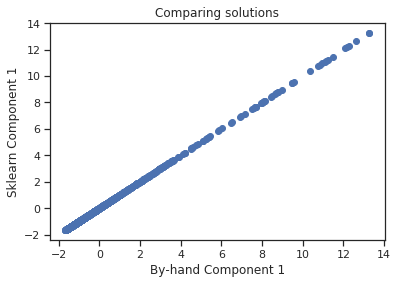

In [715]:
sklearn_pca = PCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

print('The percentage of total variance in the dataset explained by the first',
      'component from Sklearn PCA.\n', sklearn_pca.explained_variance_ratio_)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

+ The percentage of total variance in the dataset explained by the first component from Sklearn PCA is 0.796.

In [720]:
education_df["PCA_1"] = sklearn_pca.fit_transform(X)
education_df.corr()

,AVG_SCORES,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,PCA_1
AVG_SCORES,1.000000,0.094051,0.100969,0.102374,0.017279,0.025425,0.088617
TOTAL_EXPENDITURE,0.094051,1.000000,0.991142,0.992976,0.945068,0.930017,0.995565
INSTRUCTION_EXPENDITURE,0.100969,0.991142,1.000000,0.975980,0.907491,0.892688,0.977088
SUPPORT_SERVICES_EXPENDITURE,0.102374,0.992976,0.975980,1.000000,0.952709,0.914641,0.991091
OTHER_EXPENDITURE,0.017279,0.945068,0.907491,0.952709,1.000000,0.920035,0.966347
CAPITAL_OUTLAY_EXPENDITURE,0.025425,0.930017,0.892688,0.914641,0.920035,1.000000,0.952197
PCA_1,0.088617,0.995565,0.977088,0.991091,0.966347,0.952197,1.000000


### 5. If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

+ There are other cells that correlate more with the average scores than PCA_1, so it would make more sense to use them.